In [55]:
import os
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import urllib.parse as urlparse

In [150]:
from matplotlib import font_manager
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = "Arial Unicode MS")

### 1. 데이터 로드 및 확인

In [17]:
print(os.listdir("./skt_raw_data/"))

['CALL_NDELIVERY_08MONTH (2).csv', 'CALL_NDELIVERY_03MONTH (4).csv', 'CALL_NDELIVERY_04MONTH (4).csv', 'CALL_NDELIVERY_11MONTH (4).csv', 'CALL_NDELIVERY_09MONTH (3).csv', 'CALL_NDELIVERY_10MONTH (4).csv', 'CALL_NDELIVERY_09MONTH.csv', 'CALL_NDELIVERY_08MONTH.csv', 'CALL_NDELIVERY_05MONTH (4).csv', 'CALL_NDELIVERY_09MONTH (2).csv', 'CALL_NDELIVERY_02MONTH (4).csv', 'CALL_NDELIVERY_08MONTH (3).csv', 'CALL_NDELIVERY_03MONTH.csv', 'CALL_NDELIVERY_02MONTH.csv', 'CALL_NDELIVERY_02MONTH (3).csv', 'CALL_NDELIVERY_06MONTH (1).csv', 'CALL_NDELIVERY_05MONTH (3).csv', 'CALL_NDELIVERY_01MONTH (1).csv', 'CALL_NDELIVERY_10MONTH (3).csv', 'CALL_NDELIVERY_08MONTH (4).csv', 'CALL_NDELIVERY_03MONTH (2).csv', 'CALL_NDELIVERY_04MONTH (2).csv', 'CALL_NDELIVERY_11MONTH (2).csv', 'CALL_NDELIVERY_04MONTH.csv', 'CALL_NDELIVERY_05MONTH.csv', 'CALL_NDELIVERY_12MONTH (1).csv', 'CALL_NDELIVERY_11MONTH (3).csv', 'CALL_NDELIVERY_04MONTH (3).csv', 'CALL_NDELIVERY_07MONTH (1).csv', 'CALL_NDELIVERY_03MONTH (3).csv', '배달

In [20]:
os.listdir("./skt_raw_data/")[0]

'CALL_NDELIVERY_08MONTH (2).csv'

In [2]:
df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[0])

In [3]:
df_1 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[1])

In [4]:
df = df_0.append(df_1)

In [5]:
for i in range(2, 73):
    try:
        df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[i])
        df = df.append(df_0)
    except:
        pass

df.tail()


,일자,요일,시간대,업종,시도,시군구,읍면동,통화건수,이용건수,통화량
2624,20140430,수,22,피자,NaN,NaN,NaN,NaN,418.0,NaN
2625,20140430,수,23,음식점-족발/보쌈전문,NaN,NaN,NaN,NaN,118.0,NaN
2626,20140430,수,23,음식점-중국음식,NaN,NaN,NaN,NaN,175.0,NaN
2627,20140430,수,23,치킨,NaN,NaN,NaN,NaN,1707.0,NaN
2628,20140430,수,23,피자,NaN,NaN,NaN,NaN,109.0,NaN


In [10]:
df = df.sort_values(["일자", "시간대"])

In [32]:
df.reset_index(drop = True, inplace=True)

In [34]:
# 중복된 값 없는지 확인
display(df[df.duplicated()])

,date,weekday,hour,menu,sido,sigungu,dong,call1,call2,call3,count


In [15]:
# 컬럼명 영문 변경
df.columns=["date", "weekday", "hour", "menu", "sido", "sigungu", "dong", "call1", "call2", "call3"]

In [21]:
# 컬럼명은 다르지만 동일한 "통화주문건수" 임음 확인하고 합치고 기존 컬럼은 지우기
df["call1"].notnull().sum() + df["call2"].notnull().sum() +df["call3"].notnull().sum()

5445993

In [23]:
df["call1"].fillna(0, inplace=True)
df["call2"].fillna(0, inplace=True)
df["call3"].fillna(0, inplace=True)

In [24]:
df["count"] = df["call1"] +df["call2"]+df["call3"]

In [33]:
df.tail()

,date,weekday,hour,menu,sido,sigungu,dong,call1,call2,call3,count
5445988,20190930,월,23,피자,서울특별시,서초구,양재동,5.0,0.0,0.0,5.0
5445989,20190930,월,23,피자,서울특별시,성북구,동선동2가,5.0,0.0,0.0,5.0
5445990,20190930,월,23,피자,서울특별시,송파구,가락동,5.0,0.0,0.0,5.0
5445991,20190930,월,23,피자,서울특별시,영등포구,영등포동5가,5.0,0.0,0.0,5.0
5445992,20190930,월,23,피자,서울특별시,중랑구,면목동,5.0,0.0,0.0,5.0


In [35]:
df.drop(columns=["call1","call2","call3"], inplace=True)

In [36]:
df.tail()

,date,weekday,hour,menu,sido,sigungu,dong,count
5445988,20190930,월,23,피자,서울특별시,서초구,양재동,5.0
5445989,20190930,월,23,피자,서울특별시,성북구,동선동2가,5.0
5445990,20190930,월,23,피자,서울특별시,송파구,가락동,5.0
5445991,20190930,월,23,피자,서울특별시,영등포구,영등포동5가,5.0
5445992,20190930,월,23,피자,서울특별시,중랑구,면목동,5.0


In [141]:
# 서울아닌 지역 포함되어 있는지 확인 후 있으면 해당 row 삭제
not_seoul = df[df["sido"]!="서울특별시"][df["sido"].notnull()].index
not_seoul

KeyError: 'sido'

In [48]:
df_1 = df.drop(not_seoul).reset_index(drop = True)

In [46]:
df_1[df_1["sido"]!="서울특별시"][df_1["sido"].notnull()]

,date,weekday,hour,menu,sido,sigungu,dong,count


In [57]:
# 서울 전체 지역의 일자별을 확인하고자 하므로 
# 시군구, 동은 시간 및 업종으로 grouping 후 컬럼 삭제
df_del_detail = df.drop(columns = ["sigungu", "dong"])

In [63]:
df_grouping= df_del_detail.groupby(by=["date", "weekday", "hour","menu"], as_index=False).sum()

In [65]:
df_grouping.tail()

,date,weekday,hour,menu,count
203563,20190930,월,22,피자,205.0
203564,20190930,월,23,음식점-족발/보쌈전문,65.0
203565,20190930,월,23,음식점-중국음식,90.0
203566,20190930,월,23,치킨,392.0
203567,20190930,월,23,피자,75.0


In [66]:
df = df_grouping

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203568 entries, 0 to 203567
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     203568 non-null  int64  
 1   weekday  203568 non-null  object 
 2   hour     203568 non-null  int64  
 3   menu     203568 non-null  object 
 4   count    203568 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.3+ MB


In [143]:
df_2013_to_2019 = pd.read_pickle("./df_by_date.pkl")

In [72]:
# 연, 월, 일에 따른 분포 확인을 위해 date 컬럼을 속성별로 구분 후 컬럼 추가
df['year'] = df.date.apply(lambda x : str(x)[:4])
df['month'] = df.date.apply(lambda x : str(x)[4:6])
df['day'] = df.date.apply(lambda x: str(x)[6:])

In [75]:
# 공휴일과 평일의 분포를 확인하기 위해 컬럼 추가
df["holiday"] = df.weekday.apply(lambda x : 1 if x == "토" or x=="일" else 0)

In [142]:
# 토, 일을 제외한 국경일 및 공휴일 추가
url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService"
operation = "getRestDeInfo"
mykey = 'ac%2FSOW4KzOFKdu0z01iEVWGZd4TBl1MyiR04%2FfYmADthCjJBEyL73pewbapUk94Gm1%2FqtzMCban3C%2BpqU8c7ew%3D%3D'

date = []
datename = []
for year in range(2016, 2020):
    year = str(year)
    
    for month in range(1, 13):
        if month < 10:
            month = "0" + str(month)
        else:
            month = str(month)
            
        params = {'solYear' : year, 'solMonth' : month}
        rq_query = url +'/' + operation + '?' + urlparse.urlencode(params) + "&serviceKey=" + mykey    
        response = requests.get(rq_query) 
        dom = BeautifulSoup(response.content, "html.parser")
        
        items = dom.find_all("item")
        for item in items:
            date.append(item.locdate.string)
            datename.append(item.datename.string)

holiday_df= pd.DataFrame({"date": date, "datename": datename})

In [ ]:
# 데이터프레임 피클 저장
holiday_df.to_pickle("./holiday_df.pkl")

In [ ]:
# 기존 주문량 데이터와 공휴일 데이터 합치기 (2016.10~2019.09)
df = pd.read_pickle("./df_by_date_201610_201909.pkl")
df["date"] = df.date.astype(str)
df_1 = pd.merge(df, holiday_df, how = "left")

In [145]:
df = pd.read_pickle("./df_by_date_201610_201909.pkl")
df["date"] = df.date.astype(str)
df_1 = pd.merge(df, holiday_df, how = "left")
df_1.loc[df_1["datename"].notnull(), "holiday"] = 1
df=df_1

In [ ]:
# 계절 컬럼 추가 
def season(month): 
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "fall"

df["season"] = df.month.apply(season)

In [146]:
df['year'] = pd.to_numeric(df.year, errors='coerce')
df['month'] = pd.to_numeric(df.month, errors='coerce')
df['day'] = pd.to_numeric(df.day, errors='coerce')

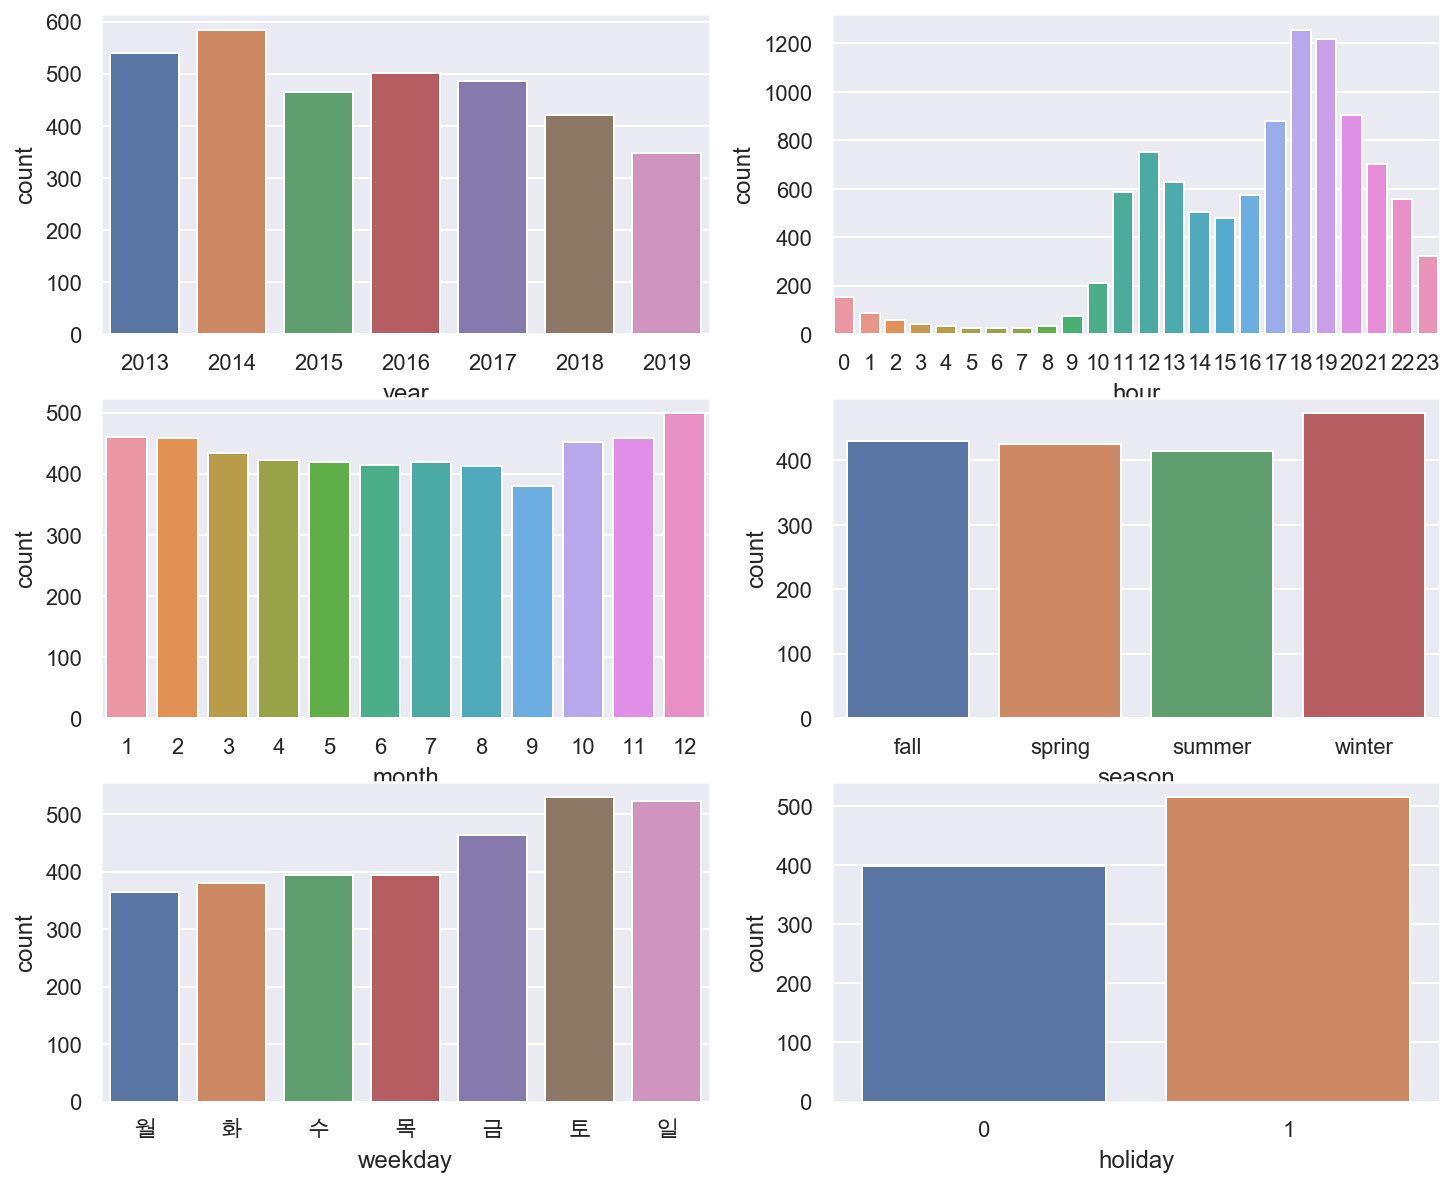

In [151]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.barplot(x='year', y='count',
                  data=df_2013_to_2019.groupby('year')['count'].mean().reset_index())

ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.barplot(x='hour', y='count',
                  data=df.groupby('hour')['count'].mean().reset_index())



ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.barplot(x='month', y='count',
                  data=df.groupby('month')['count'].mean().reset_index())


ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.barplot(x='season', y='count',
                  data=df.groupby('season')['count'].mean().reset_index())

ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.barplot(x='weekday', y='count', order = ["월","화","수","목","금","토","일"],
                  data=df.groupby('weekday')['count'].mean().reset_index())

ax6 = fig.add_subplot(3, 2, 6)
ax6 = sns.barplot(x='holiday', y='count',
                  data=df.groupby('holiday')['count'].mean().reset_index())

In [83]:
# 1. 연도별 주문량 추이는 배달어플 이용자의 증가에 따라 통화량은 줄어든다
# 2. 시간대별 전체 주문량 / 점심, 저녁에 몰려있고 점심보다 저녁 주문량이 많음
# 3-4. 겨울철 주문량이 다른 계절 주문량보다 많다. 
# 5-6. 주말 주문량이 평일 주문량보다 많다.

### 1. 2014년 부터 배달량이 감소한걸까?

- 배달의 민족 류승룡 모델 발탁, TV 광고 시작
- 배달 어플의 시대 시작
- 배달의 민족 통계 이미지 참고

### 2. 여름보다 겨울에 배달량이 많을까? 휴일과 평일에 따른 계절별 주문량은 어떨까?

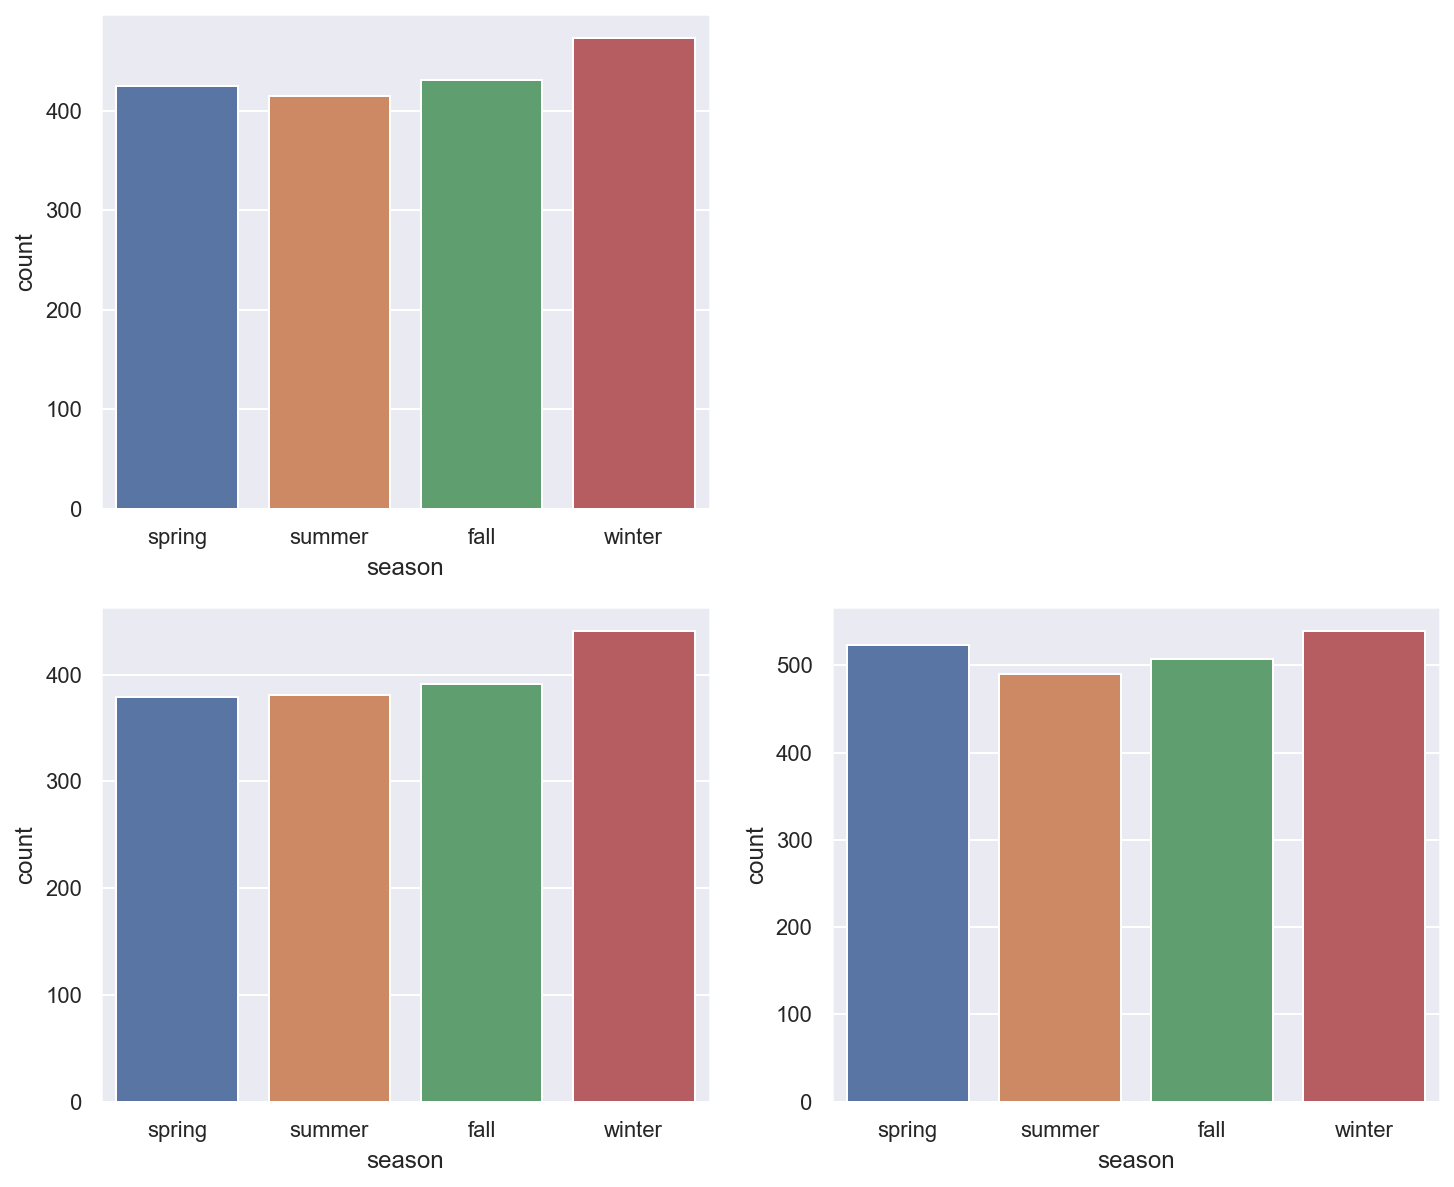

In [155]:
# 계절별 / 휴일별 
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x='season', y='count', order=["spring", "summer", "fall", "winter"],
                  data=df.groupby("season")['count'].mean().reset_index())

ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x='season', y='count', order=["spring", "summer", "fall", "winter"],
                  data=df[df["holiday"]==0].groupby("season")['count'].mean().reset_index())

ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x='season', y='count', order=["spring", "summer", "fall", "winter"],
                  data=df[df["holiday"]==1].groupby("season")['count'].mean().reset_index())


In [ ]:
# 휴일 여부에 따라 계절 (봄, 여름)배달 분포 조금 다를 듯 . .  정규화에 도전해보자

### 5. 점심시간대와 저녁시간대에 배달량 급증 -> 다른변수(holiday, menu)에 상관없이 항상 그럴까?

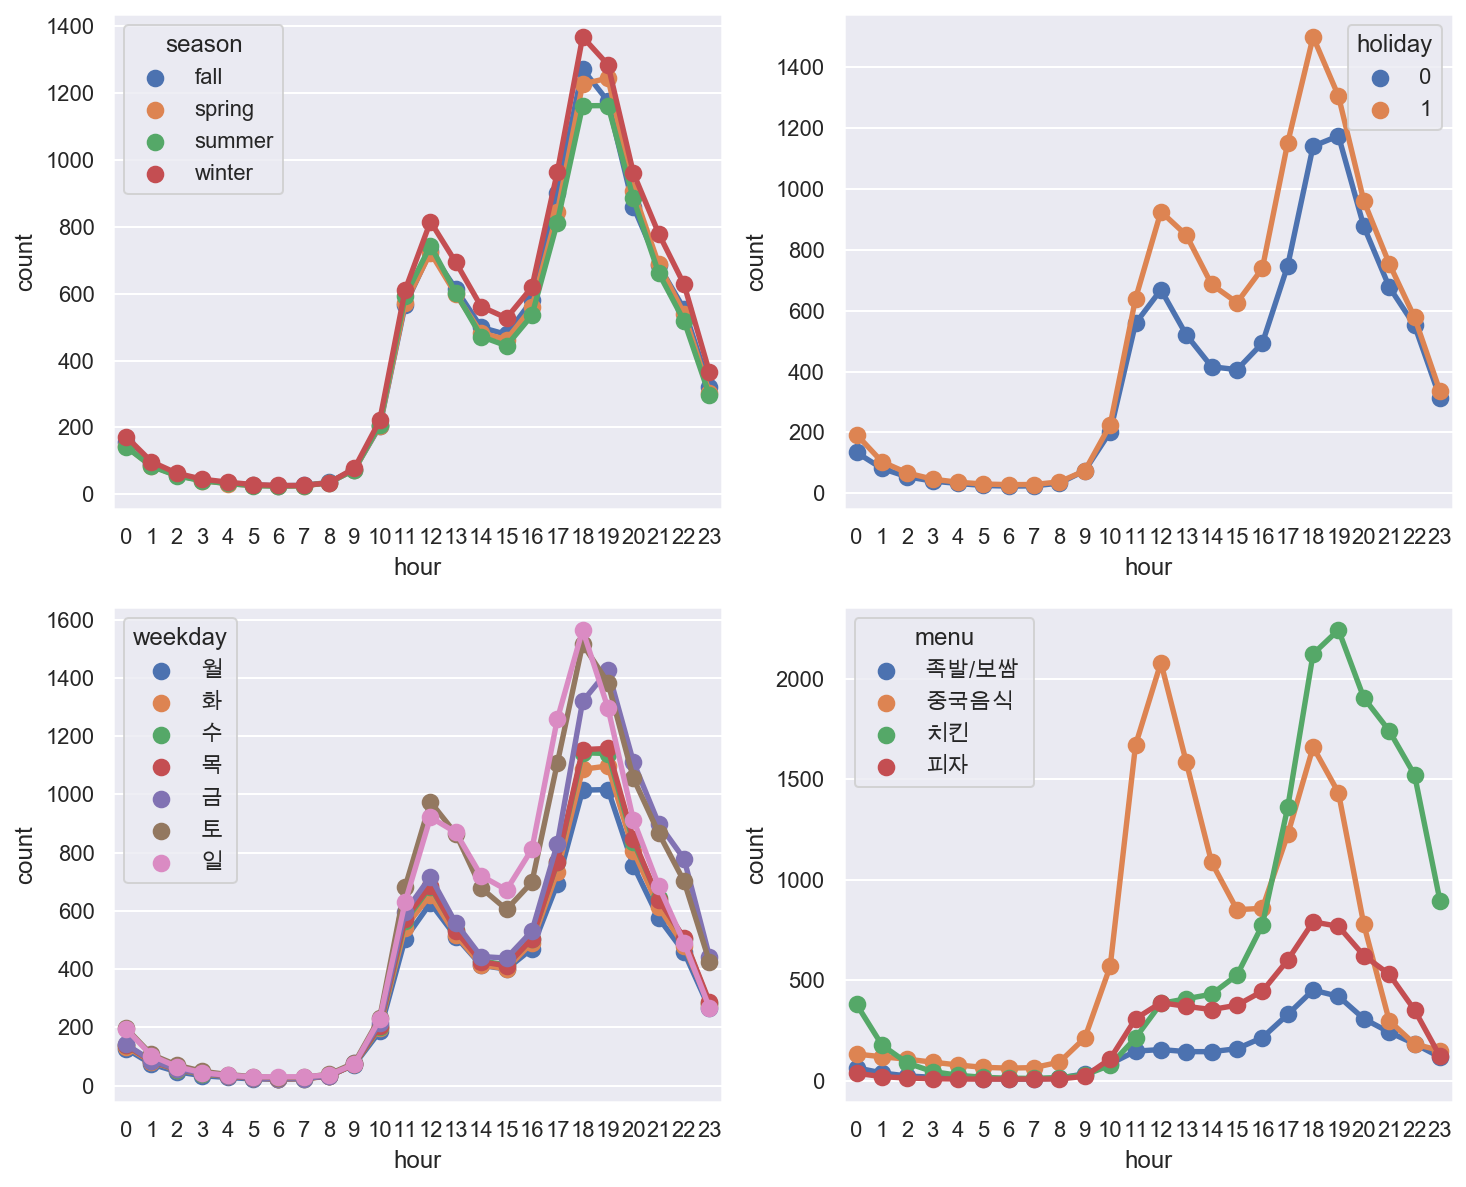

In [156]:
# 1. 시간과 계절에 따른 count
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x='hour', y='count', hue="season",
                    data=df.groupby(['season', 'hour'])['count'].mean().reset_index())

# 2. 시간과 휴일에 따른 count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x='hour', y='count', hue="holiday",
                    data=df.groupby(['holiday', 'hour'])['count'].mean().reset_index())

# 3. 시간과 요일에 따른 count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x='hour', y='count', hue="weekday", hue_order=['월', '화',
                                                                   '수', '목',
                                                                   '금', '토',
                                                                   "일"],
                    data=df.groupby(['weekday', 'hour'])['count'].mean().reset_index())
# 4. 시간과 메뉴에 따른 count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df.groupby(['menu', 'hour'])['count'].mean().reset_index())

### 6. 주말 배달량 > 평일 배달량 -> 모든 주말은 모든 평일보다 배달량이 많을까?

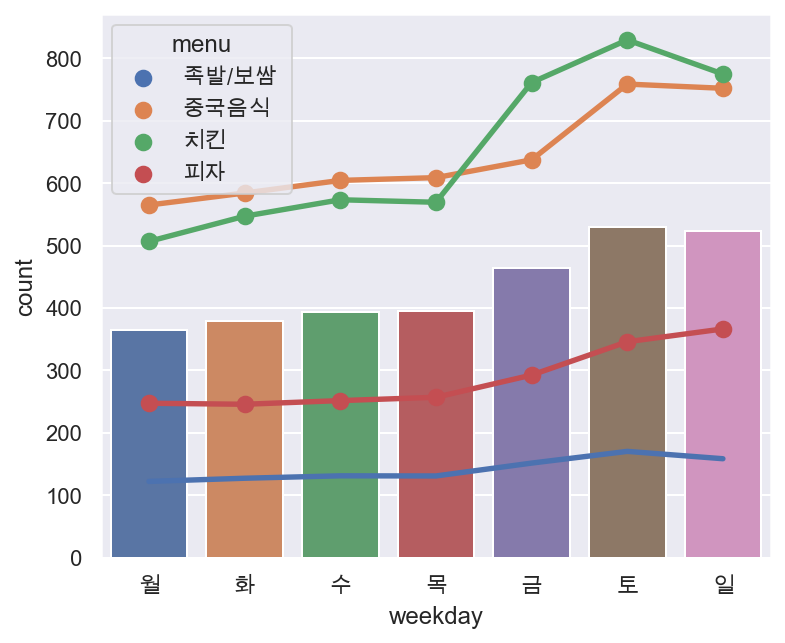

In [158]:
fig = plt.figure(figsize=(6, 5))

ax1 = sns.barplot(x='weekday', y='count', order = ["월","화", "수", "목", "금", "토", "일"],
                    data=df.groupby(['weekday'])['count'].mean().reset_index())
ax1 = sns.pointplot(x='weekday', y='count', hue='menu', order = ["월","화", "수", "목", "금", "토", "일"],
                    data=df.groupby(['weekday','menu'])['count'].mean().reset_index())

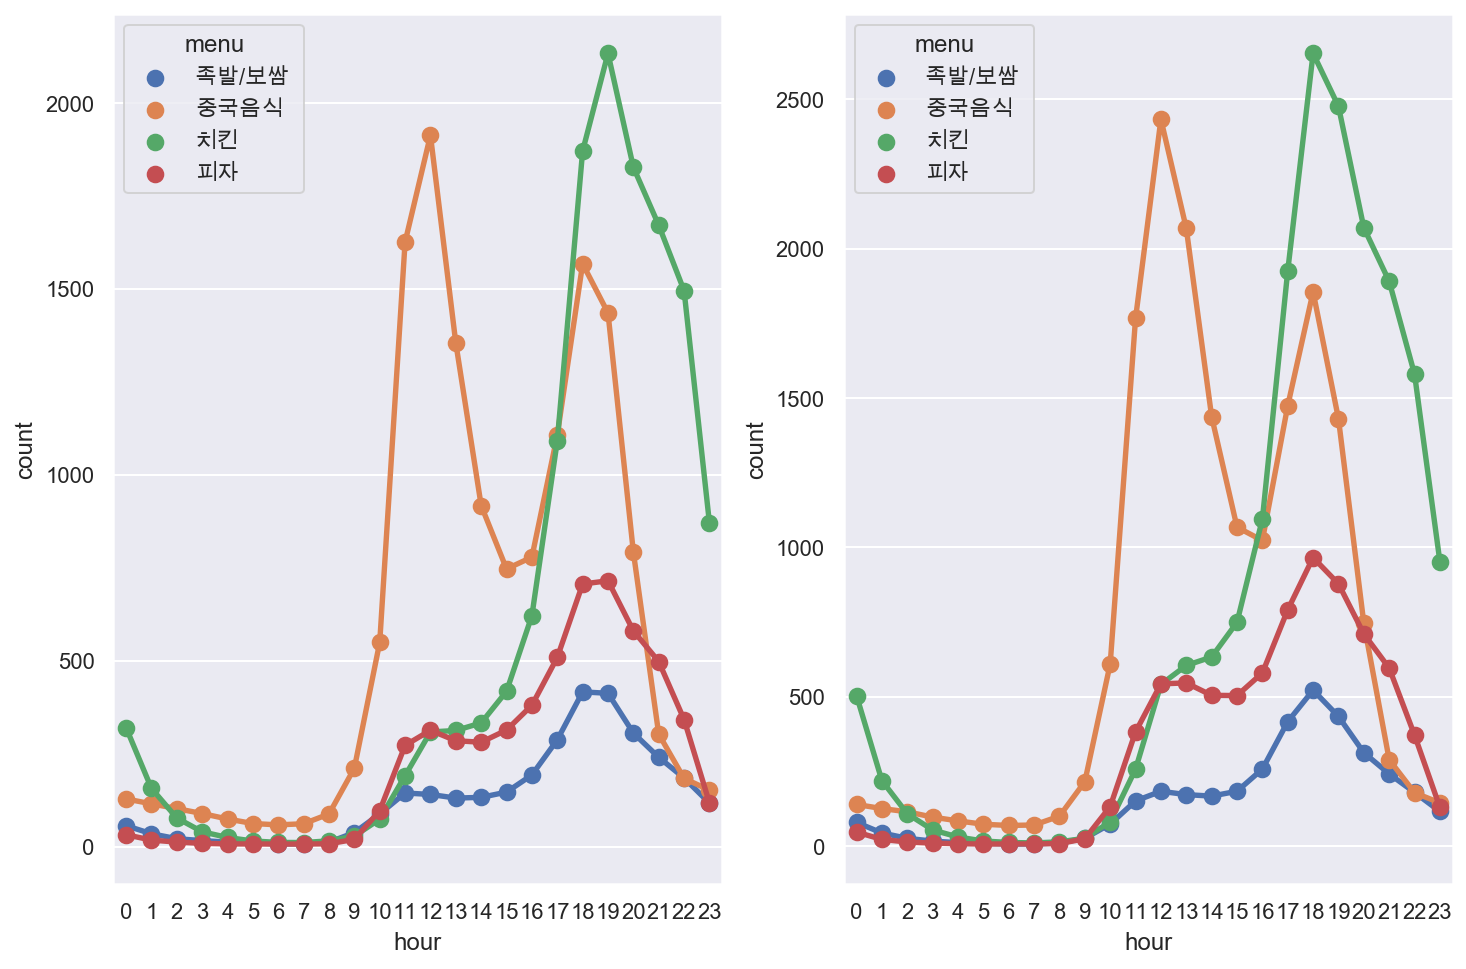

In [157]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df[df["holiday"]==0].groupby(['menu', 'hour'])['count'].mean().reset_index())

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df[df["holiday"]==1].groupby(['menu', 'hour'])['count'].mean().reset_index())